In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [107]:
data = pd.read_csv('/Users/jasonpaik9/Documents/Thinkful/Bootcamp/Unit 2/HREmployeeAttrition.csv')

In [108]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [123]:
dataFeature = data[['EmployeeNumber','Attrition','JobRole','WorkLifeBalance','OverTime','MonthlyIncome','YearsAtCompany',
         'DistanceFromHome','YearsSinceLastPromotion']]

In [124]:
dataFeature['Attrition'] = dataFeature.Attrition.eq('Yes').mul(1)
dataFeature['OverTime'] = dataFeature.OverTime.eq('Yes').mul(1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
dataFeature.head()

,EmployeeNumber,Attrition,JobRole,WorkLifeBalance,OverTime,MonthlyIncome,YearsAtCompany,DistanceFromHome,YearsSinceLastPromotion
0,1,1,Sales Executive,1,1,5993,6,1,0
1,2,0,Research Scientist,3,0,5130,10,8,1
2,4,1,Laboratory Technician,3,1,2090,0,2,0
3,5,0,Research Scientist,3,1,2909,8,3,3
4,7,0,Laboratory Technician,3,0,3468,2,2,2


In [126]:
dataFeature.head()

,EmployeeNumber,Attrition,JobRole,WorkLifeBalance,OverTime,MonthlyIncome,YearsAtCompany,DistanceFromHome,YearsSinceLastPromotion
0,1,1,Sales Executive,1,1,5993,6,1,0
1,2,0,Research Scientist,3,0,5130,10,8,1
2,4,1,Laboratory Technician,3,1,2090,0,2,0
3,5,0,Research Scientist,3,1,2909,8,3,3
4,7,0,Laboratory Technician,3,0,3468,2,2,2


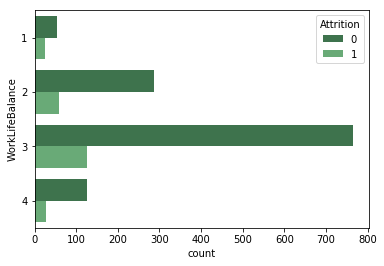

In [127]:
sns.countplot(y="WorkLifeBalance", hue="Attrition", data=dataFeature, palette="Greens_d")
plt.show()

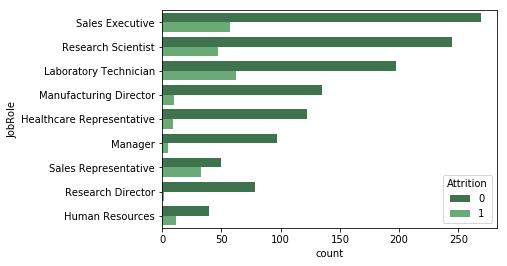

In [114]:
sns.countplot(y="JobRole", hue="Attrition", data=dataFeature, palette="Greens_d")
plt.show()

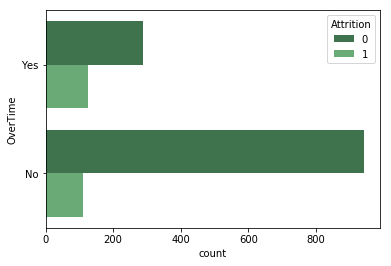

In [115]:
sns.countplot(y="OverTime", hue="Attrition", data=dataFeature, palette="Greens_d")
plt.show()

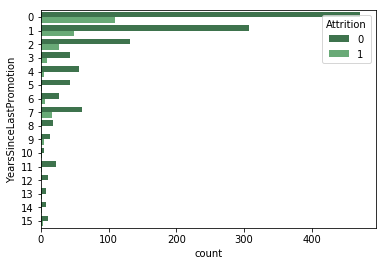

In [116]:
sns.countplot(y="YearsSinceLastPromotion", hue="Attrition", data=dataFeature, palette="Greens_d")
plt.show()

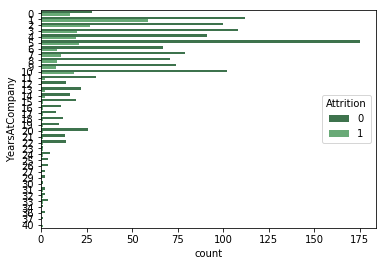

In [133]:
sns.countplot(y="YearsAtCompany", hue="Attrition", data=dataFeature, palette="Greens_d")
plt.show()

In [129]:
df_feature = dataFeature[['Attrition','WorkLifeBalance','MonthlyIncome','OverTime','YearsAtCompany',
         'DistanceFromHome','YearsSinceLastPromotion']]

In [130]:
df_feature.head()

,Attrition,WorkLifeBalance,MonthlyIncome,OverTime,YearsAtCompany,DistanceFromHome,YearsSinceLastPromotion
0,1,1,5993,1,6,1,0
1,0,3,5130,0,10,8,1
2,1,3,2090,1,0,2,0
3,0,3,2909,1,8,3,3
4,0,3,3468,0,2,2,2


In [131]:
corrmat = df_feature.corr()
print(corrmat)

                         Attrition  WorkLifeBalance  MonthlyIncome  OverTime  \
Attrition                 1.000000        -0.063939      -0.159840  0.246118   
WorkLifeBalance          -0.063939         1.000000       0.030683 -0.027092   
MonthlyIncome            -0.159840         0.030683       1.000000  0.006089   
OverTime                  0.246118        -0.027092       0.006089  1.000000   
YearsAtCompany           -0.134392         0.012089       0.514285 -0.011687   
DistanceFromHome          0.077924        -0.026556      -0.017014  0.025514   
YearsSinceLastPromotion  -0.033019         0.008941       0.344978 -0.012239   

                         YearsAtCompany  DistanceFromHome  \
Attrition                     -0.134392          0.077924   
WorkLifeBalance                0.012089         -0.026556   
MonthlyIncome                  0.514285         -0.017014   
OverTime                      -0.011687          0.025514   
YearsAtCompany                 1.000000          0.009

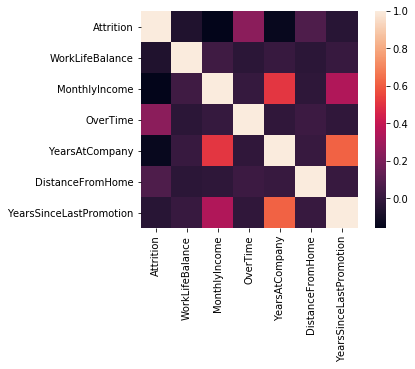

In [132]:
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

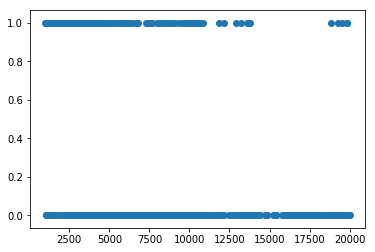

In [121]:
plt.scatter(dataFeature.MonthlyIncome,dataFeature.Attrition)
plt.show()

10 New Features

For this challenge's dataset, we are trying to create new features that help better explain the attrition of employees leaving their company based on the Human Resources data given.

To account for attrition I've chosen the following categorical variables - Job Role, Work Life Balance, and Overtime. For continuous variables, I've chosen Monthly Income, Years at Company, Distance from Home, and the number of years worked since last promotion.

Here are some of the features I would be keen on looking into:

1) WorkLifeBalance
- When I did a countplot of the WorkLifeBalance ratings (between 1-5) and tracked it against Attrition (0 = no turnover, 1 = turnover), I noticed there were not any 5 ratings against WorkLifeBalance. It would be interesting to see why employees didn't think this company (IBM) didn't produce any rating of a WorkLifeBalance, possibly alluding to a harsh culture of over-working. However, the highest turnover of attrition came where WorkLifeBalance was average (value of 3) so there may not have been much that stood out - WorkLifeBalance was just "okay" in the grand scheme of things. The second highest ratio between WorkLifeBalance scores and Attrition was the most varied between WorkLifeBalance scores of 2, despite 4 ratings having the lowest attrition. This might show that WorkLifeBalance has some importance, but maybe not as much as one would think. A new feature would be best if we thought about WorkLifeBalance in regards to what exactly that is - is it overtime? Is it company culture? A feature like number of social events attended might be an interesting caveat to the dataset.

2) OverTime
- The categorical variable of Overtime, according to the correlation heat map, had the highest influence on Attrition. Most likely when people are being overworked, there is a strain to the turnover of employment because of its unsustainability. An interesting feature would be seeing the average age of those who do work Overtime to see if that level of sustainability is consistent amongst a certain age or duration of years worked at that company. Number of hours worked overtime also would be interesting to see if attrition follows a specific benchmark number the HR department should be weary on in not overworking its employees.

3) JobRole
- In the countplot, we saw Sales Executives and Labortory Technicians have the most attrition whereas Managers and Research Directors did not see a lot of attrition. This data is a bit biased in the sense that these two positions who experienced the most attrition most likely have the highest number of employees in those buckets thus making it more likely for attrition to occur. But it would be interesting to see (1) if these two positions are the highest employed and (2) whether those two positions have something about them intrinsically tied to them that that cause higher attrition. Could it traveling (i.e. feature = number of hours traveling) or could it be something about the labs themselves?

4) YearsSinceLastPromotion
- In the countplot with YearsSinceLastPromotion, we saw attrition at 0 years which indicates the lack of vertical movement within the company for an employee to rise up in the ranks. Their last of promotions might lead them to dissatisfaction with their job which might create insight to the attrition experienced by employees. A new feature to supplement this would be figuring out why those jobs in particular translated to high attrition - could it be the job role? Or if we found out the YearsWorkedAtCompany amongst least promoted, could it create better insight as to the longevity of workers who might feel disgruntled about their situation?

5) YearsAtCompany
- Similarly in the countplot and to the points with YearsSinceLastPromotion, the highest attrition comes from those who haven't been with the company a very long time. This might create insight as to the age of those who are turning over at the company and vice versa, with those who stay a long time most likely stay for a long time as well. Breaking down the age between the high attrition rates of younger employees might be interesting to understand and the type of job they're in - figuring which has better correlation could be an interesting feature.

6) MonthlySalary
- Running a basic scatter plot, we see around 10,000/monthly salary being the breakeven point as to where people stay or are quick to leave. Attrition is most likely linked to younger, less tenured employees who are in different life stages versus seasoned employees who have been around for awhile. The attrition is most likely linked to life stages moreso than not and the MonthlySalary scatter plot shows a bit of insight into this - I would be keen to understand these levels and figuring out at what salary point tends to keep employees there and if PerformanceRatings, at work, have any bias towards this as well.